In [ ]:
!pip install osmnx

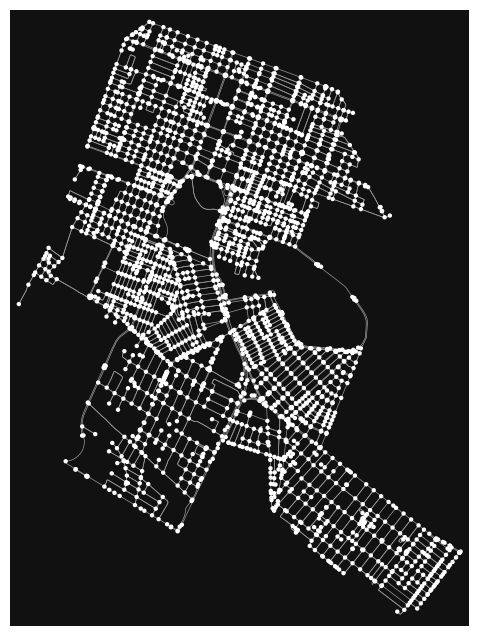

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define os nomes dos bairros e o tipo de rede
bairros = ["Capim Macio, Natal, Brazil", "Nova Descoberta, Natal, Brazil", "Lagoa Nova, Natal, Brazil", "Candelária, Natal, Brazil", "Nova Descoberta, Natal, Brazil"]
network_type = "all"

# Inicializa uma lista para armazenar os grafos dos bairros
grafos = []

# Baixa a rede para cada bairro e adiciona à lista
for bairro in bairros:
    G = ox.graph_from_place(bairro, network_type=network_type)
    grafos.append(G)

# Une os grafos dos bairros em um único grafo
G_combined = nx.compose_all(grafos)

# Plota o grafo combinado
fig, ax = ox.plot_graph(G_combined, node_size=10, edge_linewidth=0.5)


# Requisito 1


Nó: 502847237, Latitude: -5.830144, Longitude: -35.211393
Endereço aproximado: Avenida Senador Salgado Filho, Conjunto Potilândia, Lagoa Nova, Região Sul, Natal, Região Geográfica Imediata de Natal, Região Geográfica Intermediária de Natal, Rio Grande do Norte, Região Nordeste, 59064-625, Brasil

Nó: 502848536, Latitude: -5.8283989, Longitude: -35.2107404
Endereço aproximado: Avenida Senador Salgado Filho, Conjunto Potilândia, Lagoa Nova, Região Sul, Natal, Região Geográfica Imediata de Natal, Região Geográfica Intermediária de Natal, Rio Grande do Norte, Região Nordeste, 59075-000, Brasil

Nó: 501698871, Latitude: -5.8260543, Longitude: -35.2105184
Endereço aproximado: Viaduto Senador Carlos Alberto de Souza, Lagoa Nova, Região Sul, Natal, Região Geográfica Imediata de Natal, Região Geográfica Intermediária de Natal, Rio Grande do Norte, Região Nordeste, 59075-000, Brasil

Nó: 501834804, Latitude: -5.8401789, Longitude: -35.2104521
Endereço aproximado: Avenida Senador Salgado Filho, L

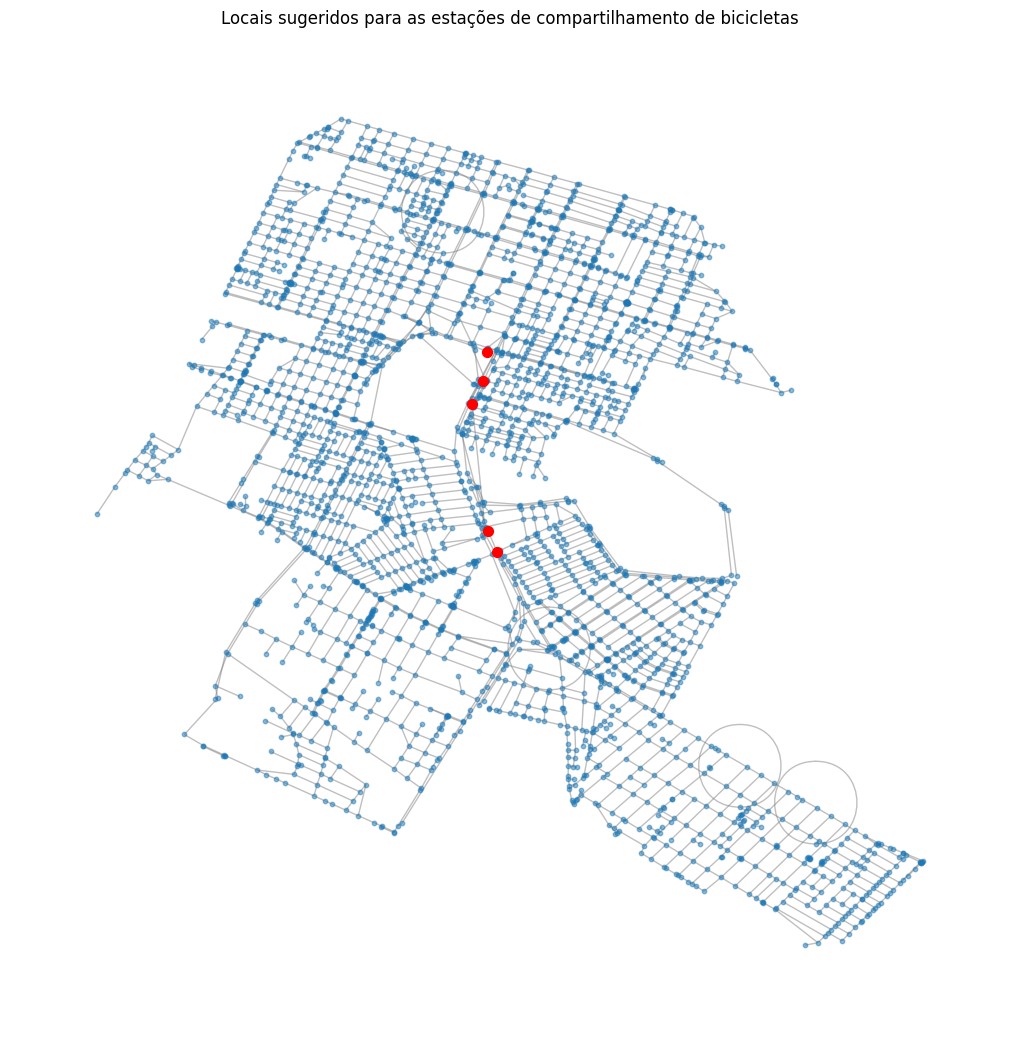

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from geopy.geocoders import Nominatim
import numpy as np

# Define os nomes dos bairros e o tipo de rede
bairros = ["Capim Macio, Natal, Brazil", "Nova Descoberta, Natal, Brazil",
           "Lagoa Nova, Natal, Brazil", "Candelária, Natal, Brazil",
           "Nova Descoberta, Natal, Brazil"]
network_type = "drive"

# Inicializa uma lista para armazenar os grafos dos bairros
grafos = []

# Baixa a rede para cada bairro e adiciona à lista
for bairro in bairros:
    G = ox.graph_from_place(bairro, network_type=network_type)
    grafos.append(G)

# Une os grafos dos bairros em um único grafo
G_combined = nx.compose_all(grafos)

# Converte para um grafo simples
G_simple = nx.Graph(G_combined)

# Calcula cada métrica de centralidade
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True, endpoints=True)
eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-6)

# Normaliza as métricas de centralidade
scaler = MinMaxScaler()
centralities = np.array([
    list(degree_centrality.values()),
    list(closeness_centrality.values()),
    list(betweenness_centrality.values()),
    list(eigenvector_centrality.values())
]).T  # Transposta para normalizar corretamente cada métrica

centralities_normalized = scaler.fit_transform(centralities)

# Atribui pesos para cada métrica
weights = np.array([0.25, 0.25, 0.25, 0.25])  # ajuste conforme necessário

# Calcula a pontuação final para cada nó
scores = centralities_normalized.dot(weights)

# Atribui as pontuações aos nós
for i, node in enumerate(G_simple.nodes):
    G_simple.nodes[node]['score'] = scores[i]

# Ordena os nós pelas pontuações e seleciona os melhores
top_nodes = sorted(G_simple.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)
top_locations = [node[0] for node in top_nodes[:5]]  # Seleciona os 5 melhores nós

# Configura o geolocalizador do geopy
geolocator = Nominatim(user_agent="bike_station_locator")

# Extrai as coordenadas e obtém os endereços aproximados
selected_locations = []
for node in top_locations:
    lat = G_combined.nodes[node]['y']
    lon = G_combined.nodes[node]['x']
    location = geolocator.reverse((lat, lon), exactly_one=True)
    address = location.address if location else "Endereço não encontrado"
    selected_locations.append({'node': node, 'latitude': lat, 'longitude': lon, 'address': address})

# Exibe os locais escolhidos
for location in selected_locations:
    print(f"Nó: {location['node']}, Latitude: {location['latitude']}, Longitude: {location['longitude']}")
    print(f"Endereço aproximado: {location['address']}\n")

# Plota o grafo usando NetworkX e destaca os nós selecionados
node_positions = {node: (data['x'], data['y']) for node, data in G_combined.nodes(data=True)}

plt.figure(figsize=(10, 10))
nx.draw(G_simple, pos=node_positions, node_size=10, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_simple, pos=node_positions, nodelist=top_locations, node_color='red', node_size=50)
plt.title("Locais sugeridos para as estações de compartilhamento de bicicletas")
plt.show()


# Requisito 2


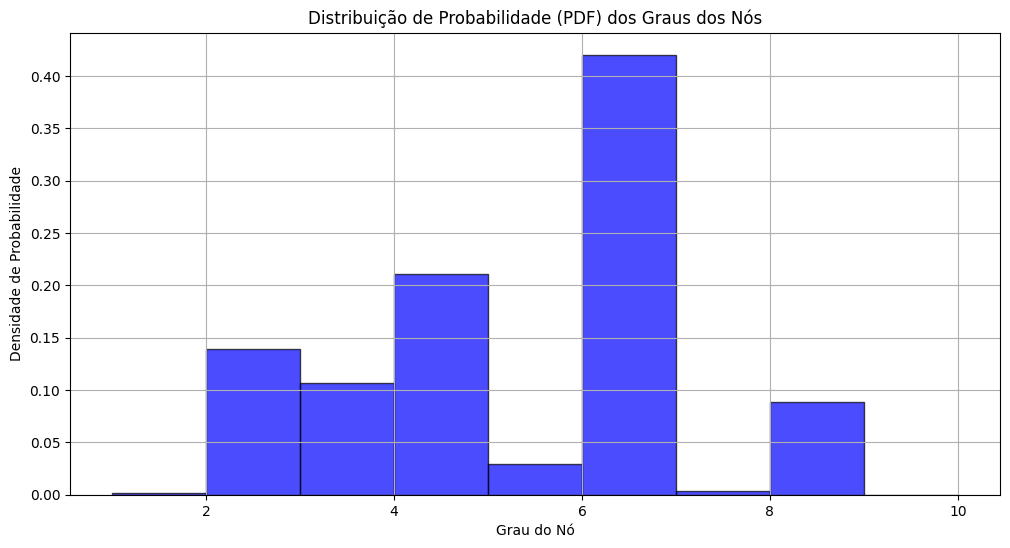

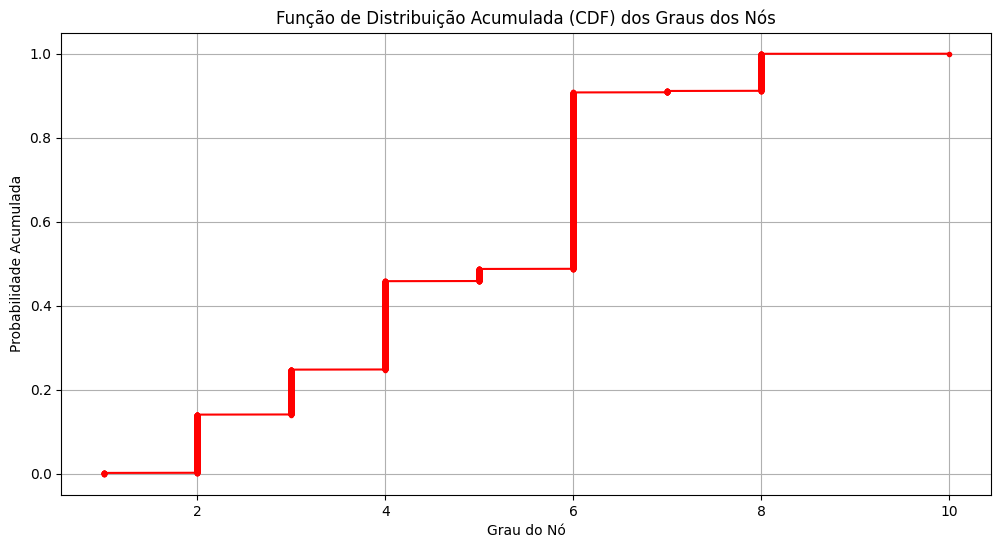

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtém os graus dos nós
graus = [G_combined.degree(n) for n in G_combined.nodes()]

# Calcular a PDF (Função de Densidade de Probabilidade)
plt.figure(figsize=(12, 6))

# Histograma da PDF com barras azuis
plt.hist(graus, bins=range(min(graus), max(graus) + 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribuição de Probabilidade (PDF) dos Graus dos Nós')
plt.xlabel('Grau do Nó')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

# Calcular a CDF (Função de Distribuição Acumulada)
plt.figure(figsize=(12, 6))

# Cálculo da CDF
graus_sorted = np.sort(graus)
cdf = np.arange(1, len(graus_sorted) + 1) / len(graus_sorted)

# Plot da CDF com uma curva vermelha
plt.plot(graus_sorted, cdf, marker='.', linestyle='-', color='red')
plt.title('Função de Distribuição Acumulada (CDF) dos Graus dos Nós')
plt.xlabel('Grau do Nó')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.show()


# Requisito 3

# Requisito 4


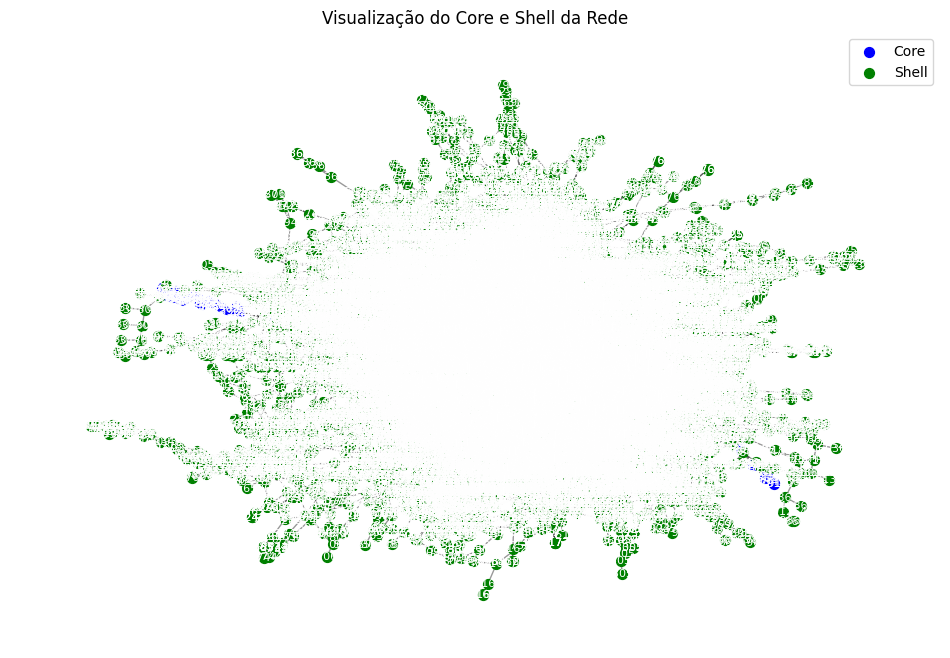

In [ ]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

# Define os nomes dos bairros e o tipo de rede
bairros = ["Capim Macio, Natal, Brazil", "Nova Descoberta, Natal, Brazil", "Lagoa Nova, Natal, Brazil", "Candelária, Natal, Brazil", "Nova Descoberta, Natal, Brazil"]
network_type = "all"

# Inicializa uma lista para armazenar os grafos dos bairros
grafos = []

# Baixa a rede para cada bairro e adiciona à lista
for bairro in bairros:
    G = ox.graph_from_place(bairro, network_type=network_type)
    grafos.append(G)

# Une os grafos dos bairros em um único grafo
G_combined = nx.compose_all(grafos)

# Converte o grafo para um grafo simples, removendo múltiplas arestas
G_simple = nx.Graph(G_combined)

# Remove auto-laços
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# Realiza a decomposição k-core no grafo simples
k_core = nx.k_core(G_simple)

# Identifica os nós no k-core
core_nodes = set(k_core.nodes())
# O shell é a parte externa, ou seja, os nós que não estão no k-core
shell_nodes = set(G_simple.nodes()) - core_nodes

# Visualiza a rede com distinção entre Core e Shell
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_simple, seed=42)

# Desenha as arestas
nx.draw_networkx_edges(G_simple, pos, alpha=0.4)

# Desenha os nós do Core em azul
nx.draw_networkx_nodes(G_simple, pos, nodelist=core_nodes, node_color='blue', node_size=50, label="Core")

# Desenha os nós do Shell em verde
nx.draw_networkx_nodes(G_simple, pos, nodelist=shell_nodes, node_color='green', node_size=50, label="Shell")

# Adiciona rótulos aos nós
nx.draw_networkx_labels(G_simple, pos, font_size=8, font_color='white')

# Configurações adicionais
plt.title('Visualização do Core e Shell da Rede')
plt.axis('off')
plt.legend(loc="best")
plt.show()
